In [1]:
%matplotlib notebook

In [2]:
import numpy
import matplotlib.pyplot as plt
plt.ion()
import scipy.optimize
import math

In [3]:
def length(v):
    length_squared = v.dot(v)
    length = length_squared**(.5)
    return length

In [4]:
def inner_angle(v1,v2):
    costheta = v1.dot(v2)/(length(v1)*length(v2))
    theta = math.acos(costheta)
    return theta

In [5]:
def total_angle(v1,v2,v3):
    v1 = v1.flatten()
    if len(v1)==2:
        v1 = numpy.r_[v1,0]
    v2 = v2.flatten()
    if len(v2)==2:
        v2 = numpy.r_[v2,0]
    costheta = numpy.dot(v1,v2)
    sintheta  = numpy.cross(v1,v2)
    l_sintheta = length(sintheta)
    neg = sintheta.dot(v3)
    if neg<0:
        neg = -1
    else:
        neg=1
    theta = math.atan2(neg*l_sintheta,costheta)
    return theta

In [6]:
def gen_function(q1,dl1,dl2,dl3,dl4):
    def calc_fourbar(variables):
        x1,y1,x2,y2,x3,y3,x4,y4 = variables
        p1 = numpy.array([x1,y1])
        p2 = numpy.array([x2,y2])
        p3 = numpy.array([x3,y3])
        p4 = numpy.array([x4,y4])

        v1  =p2-p1
        v2 = p3-p2
        v3 = p4-p3
        v4 = p1-p4

        x_axis = numpy.array([1,0])
        y_axis = numpy.array([0,1])

        l1 = length(v1)
        l2 = length(v2)
        l3 = length(v3)
        l4 = length(v4)

        error = []
        error.append([l1-dl1])
        error.append([l2-dl2])
        error.append([l3-dl3])
        error.append([l4-dl4])
        error.append([total_angle(v1,-v4,numpy.array([0,0,1]))-q1*math.pi/180])
        #error.append([inner_angle(-v4,y_axis)-q1*math.pi/180+math.pi/2])
        error.append([x1-0])
        error.append([y1-0])
        error.append([inner_angle(v1,x_axis)-0])

        error1 =numpy.array(error)
        error1 = error1.flatten()
        return length(error1)
    
    return calc_fourbar

In [7]:
ini = numpy.array([-0.  , -0.  ,  4.  , -0.  ,  2.95,  1.7 , -0.9 , -0.43],dtype = float)
#ini *=.1

all_q = numpy.r_[-180:190:30j]
path = []
q_in = []
design = numpy.array([4,2,4.4,1])
#design *=.1
for q1 in all_q:
    function=gen_function(q1,*design)
    result  = scipy.optimize.minimize(function,ini)
    points = result.x
    points =points.reshape((4,2))

    if result.fun<1e-3:
        path.append(points)
        q_in.append(q1)
        ini = result.x

In [8]:
path = numpy.array(path)
q_in = numpy.array(q_in)

<IPython.core.display.Javascript object>


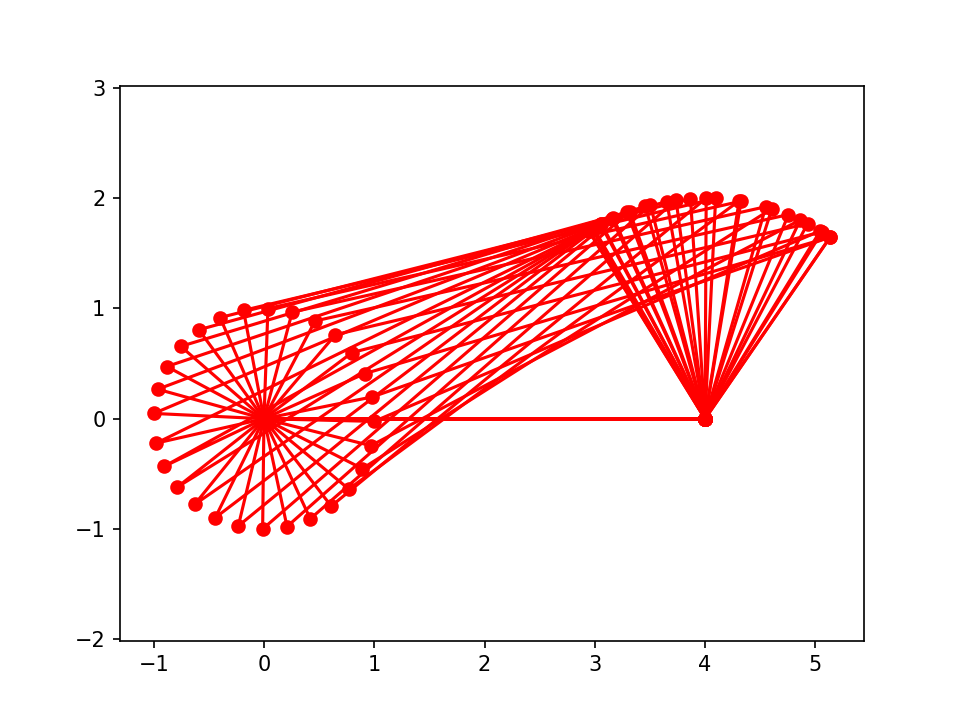

(-1.3055247662417537,
 5.4415132159256467,
 -1.1499226483886069,
 2.1499683073098628)

In [9]:
f = plt.figure()
a = f.add_subplot(111)
for item in path:
    a.plot(item[(0,1,2,3,0),0],item[(0,1,2,3,0),1],'ro-')
plt.axis('equal')

<IPython.core.display.Javascript object>


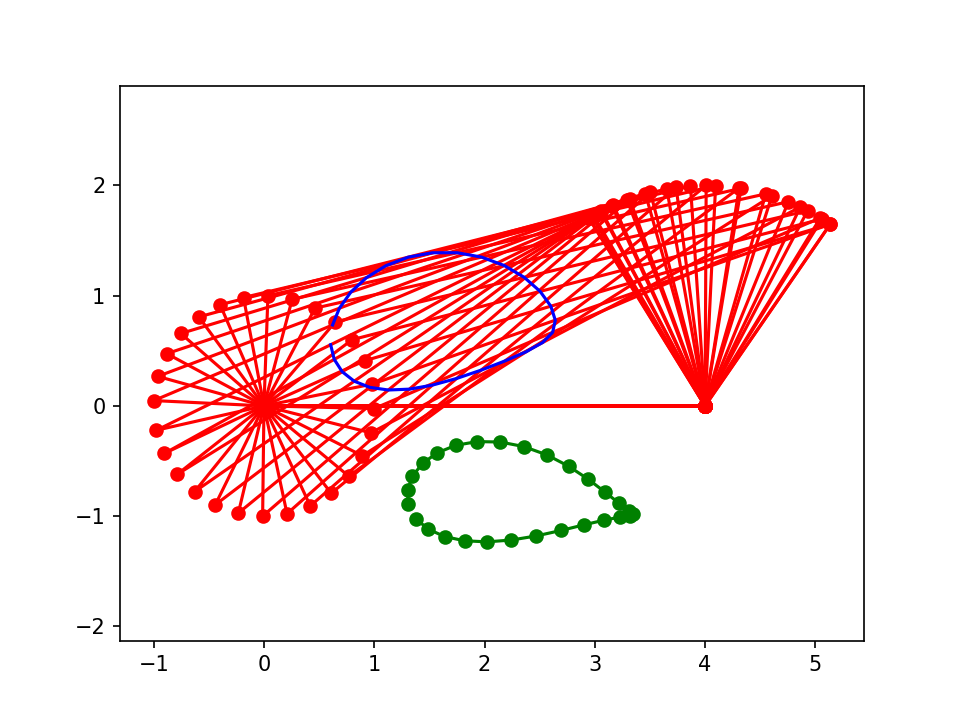

In [10]:
f = plt.figure()
a = f.add_subplot(111)
for item in path:
    a.plot(item[(0,1,2,3,0),0],item[(0,1,2,3,0),1],'ro-')
plt.axis('equal')

m1 = path[:,3]-path[:,2]
v = path[:,2]+m1*.6
#m1 = m1/((m1*m1).sum(1))**.5
T = numpy.array([[0,1],[-1,0]])
m2 = m1.dot(T)
v2 = v+m2*.4
a.plot(v[:,0],v[:,1],'b-')
a.plot(v2[:,0],v2[:,1],'go-')

In [11]:
range_min = 0
range_max = 13

In [12]:
path = numpy.concatenate((path,v[:,None,:],v2[:,None,:]),1)

<IPython.core.display.Javascript object>


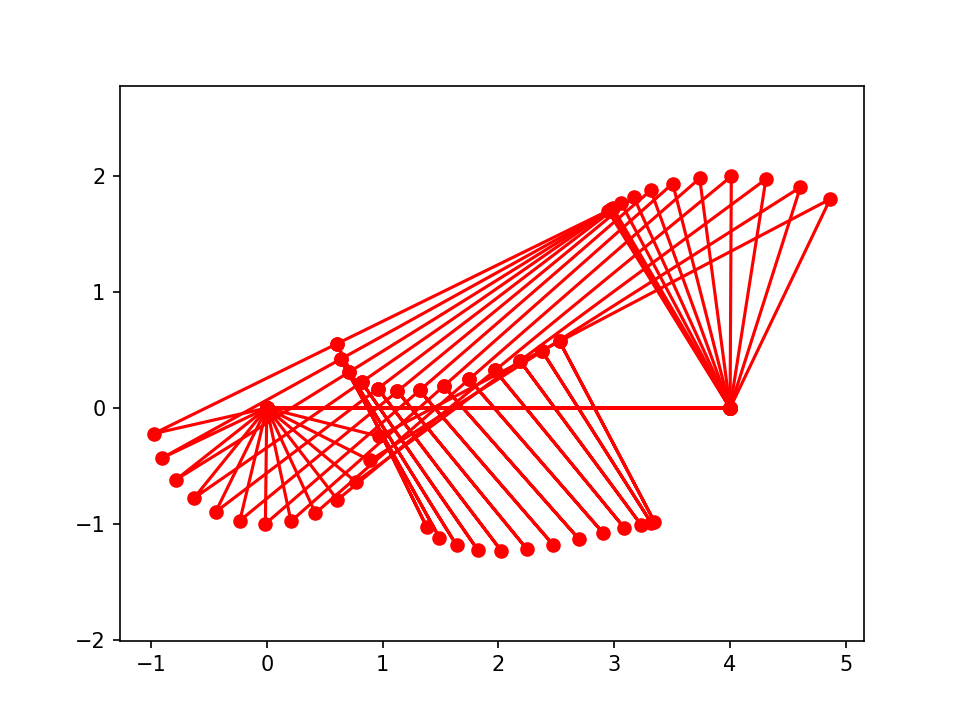

(-1.2672762191956921,
 5.1559993774661717,
 -1.3946676377399025,
 2.1616228306123051)

In [13]:
f = plt.figure()
a = f.add_subplot(111)

for item in path[range_min:range_max]:
    a.plot(item[(0,1,2,4,5,4,3,0),0],item[(0,1,2,4,5,4,3,0),1],'ro-')
plt.axis('equal')

In [14]:
y_out = v2[range_min:range_max]
q_in = q_in[range_min:range_max]

dy = y_out[2:,:]-y_out[:-2,:]
dq = q_in[2:]-q_in[:-2]

#dy = numpy.concatenate((y_out[1:,:],y_out[0:1,:]),0)-numpy.concatenate((y_out[1:,:],y_out[0:1,:]),0)
#dq = numpy.concatenate((q_in[1:],q_in[0:1]),0)-q_in
#dq %= 360



In [15]:
J=(dy.T/dq.T)
J.shape

(2, 11)

In [16]:
m = 1 #kg
g = 9.81 #m/s^2
fx = -m*g
fy = m*g #N
#f = numpy.zeros((2,len(y_out)))
#f[0,:] = fx
#f[1,:] = fy
f = numpy.array([[fx,fy]]).T
t = J.T.dot(f)

In [17]:
t #N-m

array([[-0.16080999],
       [-0.16741769],
       [-0.16674103],
       [-0.16050807],
       [-0.15073251],
       [-0.13933462],
       [-0.12755506],
       [-0.11509454],
       [-0.0991646 ],
       [-0.07430428],
       [-0.03458265]])

In [18]:
t.max()

-0.034582652141450371

In [19]:
t.min()

-0.16741768827921127